# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [34]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [36]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [37]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Find the table containing the data
table = soup.find('table')

In [38]:
# Extract all rows of data
data = []
headers = []
for row in table.find_all('tr'):
    cols = row.find_all(['td', 'th'])  # Include both td and th elements
    if len(cols) > 1:  # Skip rows with only one column
        data.append([col.get_text() for col in cols])
    else:  # Handle header rows separately
        headers = [col.get_text() for col in cols]  # Save header row text

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [39]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 1:  # Skip header rows with only one column
        data_rows.append([col.get_text() for col in cols])


In [40]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data_rows, columns=column_names)


In [41]:
# Confirm DataFrame was created successfully
print(df.head())  # Display the first few rows of the DataFrame to confirm it was created successfully


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [42]:
# Examine data type of each column
print("Data types of each column:")
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

Data types of each column:
id: object
terrestrial_date: object
sol: object
ls: object
month: object
min_temp: object
pressure: object


In [43]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)  # Convert 'id' column to integer
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert 'terrestrial_date' column to datetime
df['sol'] = df['sol'].astype(int)  # Convert 'sol' column to integer
df['ls'] = df['ls'].astype(float)  # Convert 'ls' column to float
df['month'] = df['month'].astype(int)  # Convert 'month' column to integer
df['min_temp'] = df['min_temp'].astype(float)  # Convert 'min_temp' column to float
df['pressure'] = df['pressure'].astype(float)  # Convert 'pressure' column to float


In [44]:
# Confirm type changes were successful by examining data types again
#dtype
print("Data types of each column after type changes:")
print(df.dtypes)


Data types of each column after type changes:
id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [45]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)


Number of months on Mars: 12


In [46]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
print("Number of Martian days' worth of data:", num_sols)


Number of Martian days' worth of data: 1867


In [47]:
# 3. What is the average low temperature by month?
average_temp_by_month = df.groupby('month')['min_temp'].mean()
print("Average low temperature by month:")
print(average_temp_by_month)


Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [48]:
# Plot the average temperature by month
average_temp_by_month = df.groupby('month')['min_temp'].mean()
print("Average low temperature by month:")
print(average_temp_by_month)


Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Coldest month on Mars: 3
Hottest month on Mars: 8


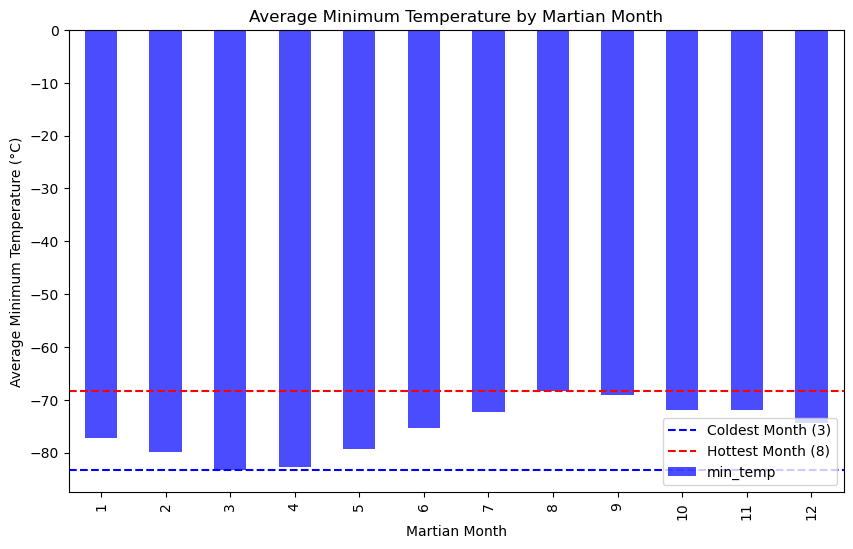

In [49]:
# Identify the coldest and hottest months in Curiosity's location
import matplotlib.pyplot as plt

# Calculate the average minimum temperature for each Martian month
average_temp_by_month = df.groupby('month')['min_temp'].mean()

# Identify the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

print("Coldest month on Mars:", coldest_month)
print("Hottest month on Mars:", hottest_month)

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_temp_by_month.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Martian Month')
plt.axhline(y=average_temp_by_month[coldest_month], color='blue', linestyle='--', label=f'Coldest Month ({coldest_month})')
plt.axhline(y=average_temp_by_month[hottest_month], color='red', linestyle='--', label=f'Hottest Month ({hottest_month})')
plt.legend()
plt.show()

In [50]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
print("Average pressure by Martian month:")
print(average_pressure_by_month)


Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


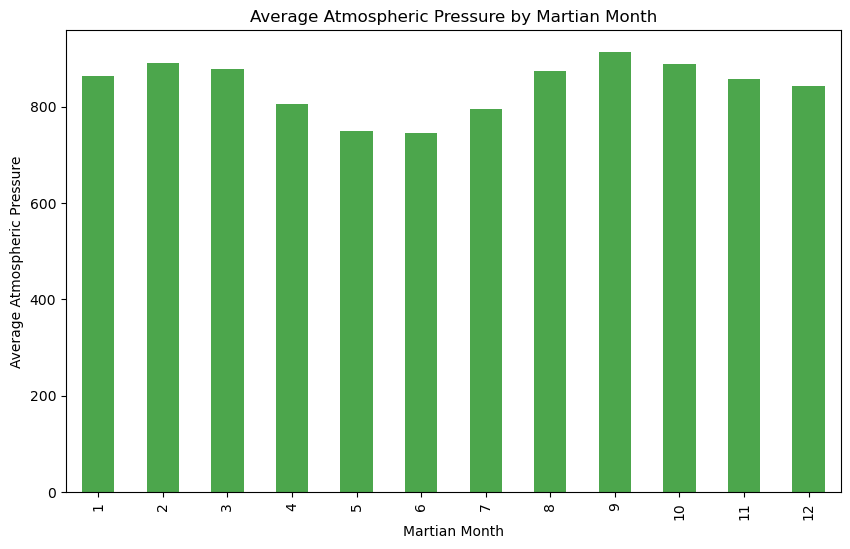

In [51]:
# Plot the average pressure by month
# Calculate the average atmospheric pressure for each Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.show()



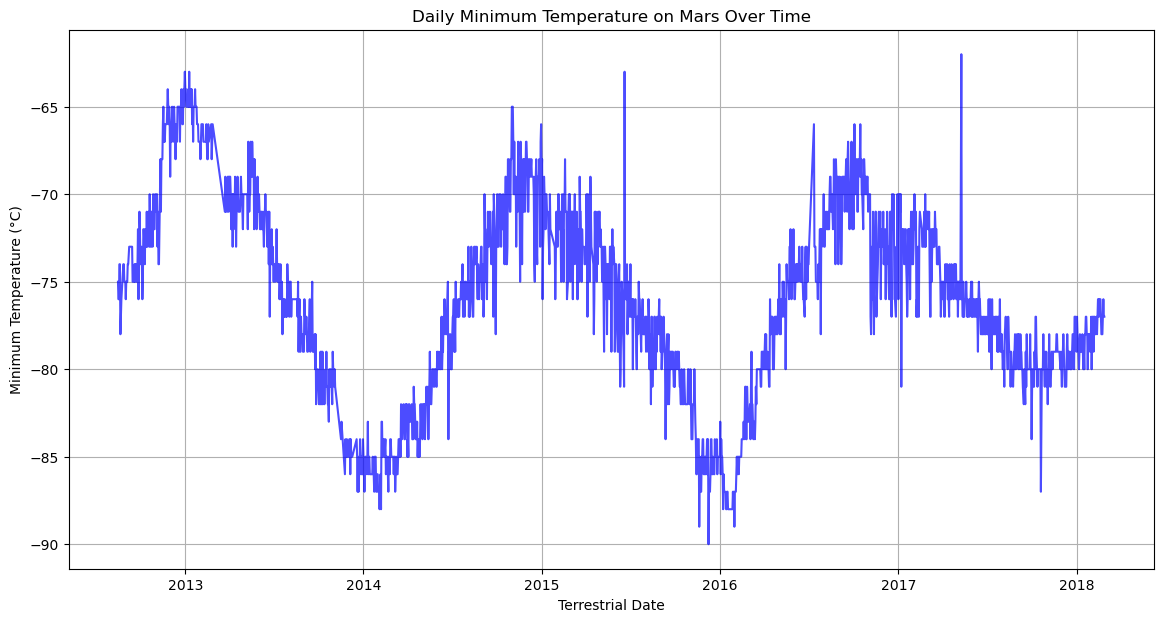

In [52]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Ensure the DataFrame is sorted by terrestrial date
df = df.sort_values('terrestrial_date')

# Plot the daily minimum temperature over time
plt.figure(figsize=(14, 7))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', alpha=0.7)
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [53]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)
print("Data has been written to mars_data.csv")

Data has been written to mars_data.csv


In [54]:
browser.quit()